In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


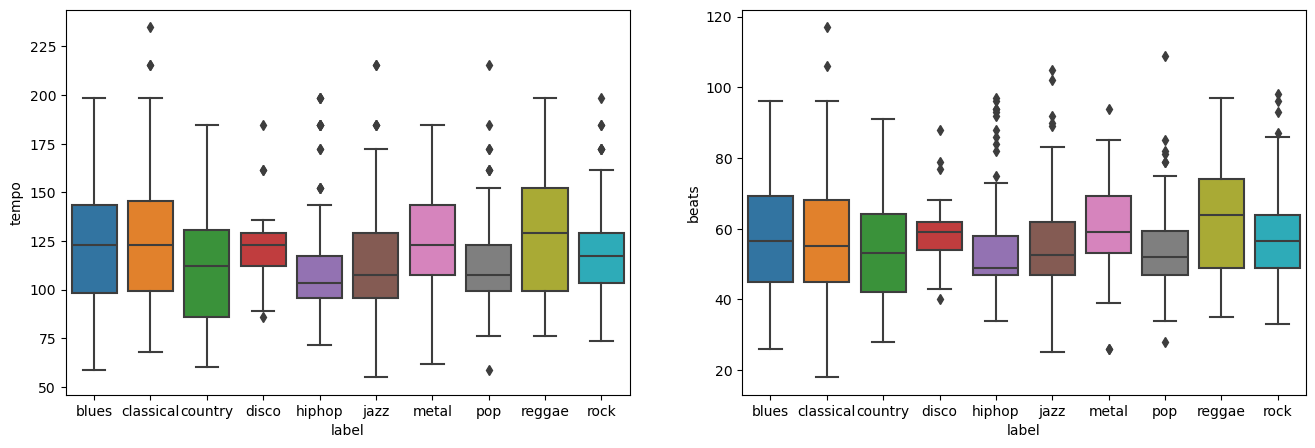

In [4]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 5), ncols=2)
sns.boxplot(y="tempo", x="label", data=df, ax=ax1)
sns.boxplot(y="beats", x="label", data=df, ax=ax2)
plt.show()

In [38]:
X = df.drop(["label", "filename"], axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [39]:
len(pd.unique(y_test))
len(pd.unique(df["label"]))
len(pd.unique(y_train))

10

In [28]:
ran_forest_model = RandomForestClassifier(n_jobs=-1)

params = {
    "n_estimators": [1, 5, 10, 15, 20, 25],
    "max_depth": [1, 3, 6, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10, 20],
}

grid = GridSearchCV(ran_forest_model, param_grid=params)
grid.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [1, 3, 6, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10, 20],
                         'n_estimators': [1, 5, 10, 15, 20, 25]})

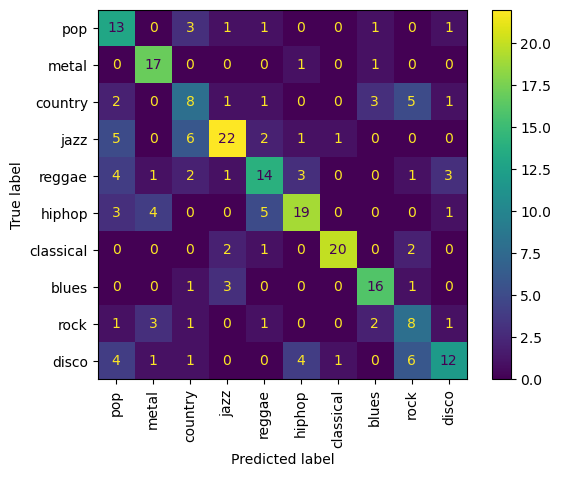

0.9986666666666667
0.596
0.604307853898905
0.5979785396716174
0.591455340563363


In [40]:
ran_forest_model = RandomForestClassifier(n_jobs=-1)
ran_forest_model.fit(X_train, y_train)

preds = ran_forest_model.predict(X_test)
train_preds = ran_forest_model.predict(X_train)
classes = pd.unique(preds)
conf_matrix = ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds, labels=classes), display_labels=classes
)
conf_matrix.plot(xticks_rotation=90)
plt.show()

print(accuracy_score(train_preds, y_train))
print(accuracy_score(preds, y_test))
print(precision_score(preds, y_test, average="macro"))
print(recall_score(preds, y_test, average="macro"))
print(f1_score(preds, y_test, average="macro"))

array([0.02066718, 0.02417198, 0.07270588, 0.06855412, 0.03608985,
       0.04724166, 0.0407619 , 0.03695725, 0.04983478, 0.02976385,
       0.03536362, 0.05643794, 0.02617013, 0.03801786, 0.0330949 ,
       0.03174352, 0.03953798, 0.02460012, 0.03401196, 0.0271278 ,
       0.03278755, 0.02405049, 0.03242158, 0.02421182, 0.03908839,
       0.02308755, 0.0250933 , 0.02640505])

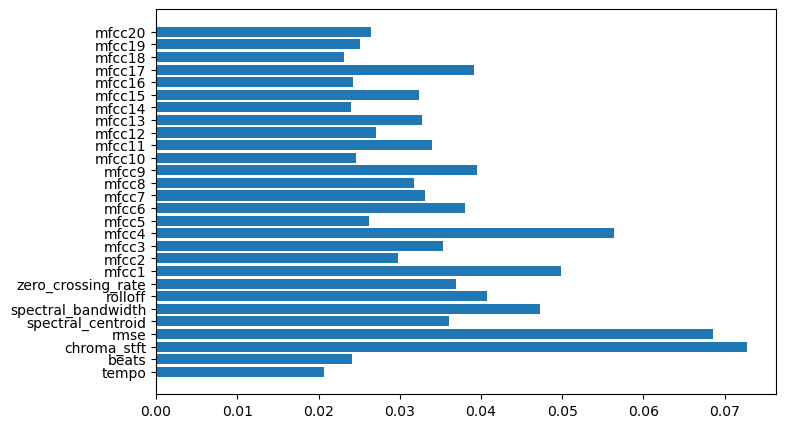

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(
    y=ran_forest_model.feature_names_in_, width=ran_forest_model.feature_importances_
)
ran_forest_model.feature_importances_